### Import

In [315]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from scipy.spatial.distance import squareform

### Create Virtual World of Cities

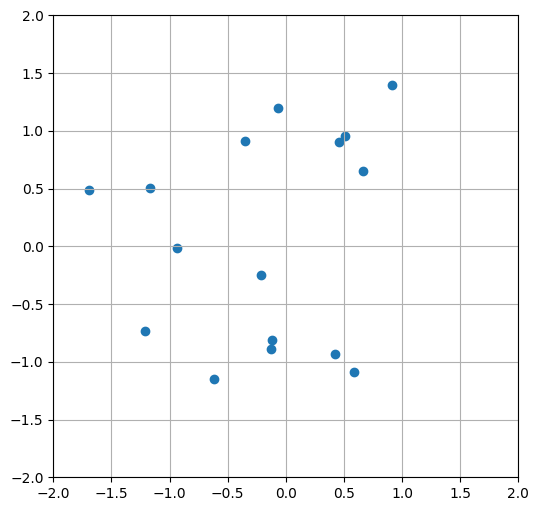

In [326]:
no_cities = 16
plt.figure(figsize=(6,6));
X = np.random.randn(no_cities,2);
plt.scatter(X[:,0],X[:,1]);
plt.grid();
plt.axis((-2,2,-2,2));

### Agent Class

In [327]:
class Agent:
    def __init__(self, index,X):
        self.index = index
        self.genes = np.random.permutation(no_cities)
        self.X = X

### Create Agents

In [328]:
no_agents = 1
agents = []
for i in range(no_agents):
    agent = Agent(i,X)
    agents.append(agent)

### Compute Agent Based Fitness Helper Function

In [329]:
def compute_fitness(agent):

    total_distance = 0
    genes = agent.genes
    for i in range(len(genes)-1):
        idx1 = genes[i+0]
        idx2 = genes[i+1]   
        pos1 = agent.X[idx1,:]
        pos2 = agent.X[idx2,:]
        d = np.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)
        total_distance = total_distance + d
    return total_distance

### Get theoretical lowest distance by brute force

In [330]:
values = []
min_value = np.Inf
best_values = []
rolling_mean = []
for i in range(10000):
    agent = Agent(i,X)
    value = compute_fitness(agent)
    if (value < min_value):
        min_value = value
        best_agent = agent
    best_values.append(min_value)
    values.append(value)
    rolling_mean.append(np.mean(values))
values = np.array(values)
best_values = np.array(best_values)
rolling_mean = np.array(rolling_mean)

### Compute Fitness of each agent

22.94412135597813
2.4414293106698426
7.877033492489718


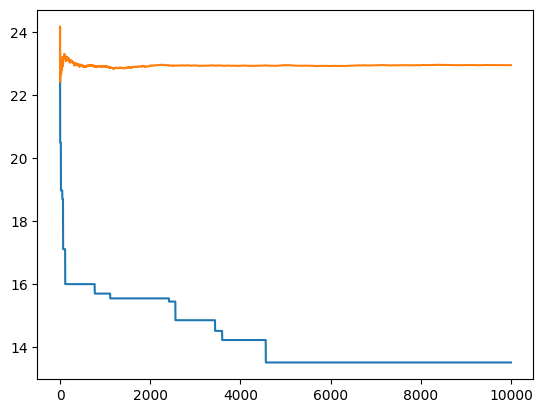

In [331]:
best_fitness_brute_force = compute_fitness(best_agent)
std_value = np.std(values)
mean_value = np.mean(values)
print(mean_value)
print(std_value)
print(best_value)
best_genes_brute_force = best_agent.genes
plt.plot(best_values)
plt.plot(rolling_mean)

### Genetic Algorithm

In [332]:
no_agents = 100
no_generations = 100
agents = []
crossover_ratio = 4
mutation_ratio = 8
for i in range(no_agents):
    agent = Agent(i,X)
    agents.append(agent)
    
#Loop through generations
population_fitness_mean = []
population_fitness_std = []
population_fitness_best = []
population_fitness_rolling_mean = []
for i in range(no_generations):

    #Compute fitness for all agents
    fitnesses = []
    for agent in agents:
        fitness = compute_fitness(agent)
        fitnesses.append(fitness)
    fitnesses = np.array(fitnesses)
    
    population_fitness_mean.append(np.mean(fitnesses))
    population_fitness_std.append(np.std(fitnesses))   
    population_fitness_best.append(np.min(fitnesses))
    population_fitness_rolling_mean.append(np.mean(population_fitness_mean))
                                           
    #Selection
    idx = np.argsort(fitnesses)
    parents_idx = idx[:int(no_agents/2)]
    randomval = np.random.permutation(len(parents_idx))
    parents_idx = parents_idx[randomval]
    fathers_idx = parents_idx[::2]
    mothers_idx = parents_idx[1::2]    

    #Cross Over
    parents = []
    offsprings = []
    for j in range(len(fathers_idx)):
        father = agents[fathers_idx[j]]
        mother = agents[mothers_idx[j]]
        parents.append(father)
        parents.append(mother)        
        swap_genes = np.random.permutation(len(father.genes))
        swap_genes_offspring_1 = swap_genes[:int(len(father.genes)/2)][::crossover_ratio]
        swap_genes_offspring_2 = swap_genes[int(len(father.genes)/2):][1::crossover_ratio]
        offspring_1 = Agent(father.index,father.X)
        offspring_2 = Agent(mother.index,mother.X)
        offspring_1.genes = father.genes.copy()
        offspring_2.genes = mother.genes.copy()
        for swap_gene_1 in swap_genes_offspring_1:
            idx1 = np.where(father.genes == swap_gene_1)[0][0]
            idx2 = np.where(mother.genes == swap_gene_1)[0][0]
            swap_gene_2 = offspring_1.genes[idx2]
            offspring_1.genes[idx1] = swap_gene_2
            offspring_1.genes[idx2] = swap_gene_1
            swap_gene_2 = offspring_2.genes[idx1]
            offspring_2.genes[idx1] = swap_gene_1
            offspring_2.genes[idx2] = swap_gene_2
        offsprings.append(offspring_1)
        offsprings.append(offspring_2)
        
    #Mutation
    for offspring in offsprings:
        mutation_genes_1 = np.random.permutation(len(offspring.genes))[::mutation_ratio]
        mutation_genes_2 = np.random.permutation(len(offspring.genes))[::mutation_ratio]
        for j in range(len(mutation_genes_1)):
            swap_gene_1 = mutation_genes_1[j]
            swap_gene_2 = mutation_genes_2[j]
            idx1 = offspring.genes[swap_gene_1]
            idx2 = offspring.genes[swap_gene_2]
            offspring.genes[swap_gene_1] = idx2
            offspring.genes[swap_gene_2] = idx1
    
    #Rebuild society by replacing less fit individuals with offspring
    agents = parents + offsprings

IndexError: index 0 is out of bounds for axis 0 with size 0

### Final Fitness

In [323]:
#Compute fitness for all agents
fitnesses = []
for agent in agents:
    fitness = compute_fitness(agent)
    fitnesses.append(fitness)
fitnesses = np.array(fitnesses)
best_index = np.argmin(fitnesses)
best_agent = agents[best_index]
best_agent_fitness = np.min(fitnesses)
population_fitness_mean = np.array(population_fitness_mean)
population_fitness_std = np.array(population_fitness_std)
population_fitness_best = np.array(population_fitness_best)
population_fitness_rolling_mean = np.array(population_fitness_rolling_mean)

In [325]:
print(best_agent.genes)
print(best_agent_fitness)
print(best_genes_brute_force)
print(best_fitness_brute_force)

[2 6 1 5 3 4 0 7]
3.978508695535201
[2 6 1 3 5 4 0 7]
4.835936783815773


### Plot

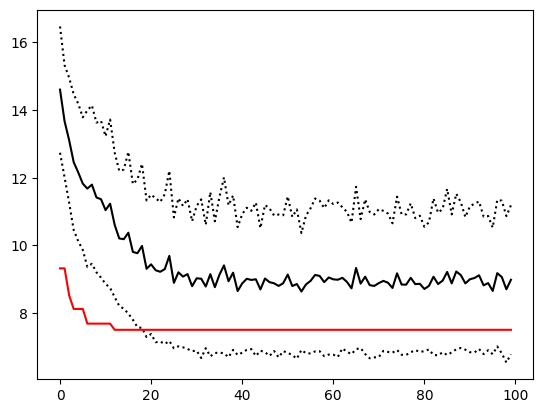

In [298]:
plt.plot(population_fitness_mean,'k')
plt.plot(population_fitness_mean-population_fitness_std,'k:')
plt.plot(population_fitness_mean+population_fitness_std,'k:')
plt.plot(population_fitness_best,'r')